In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import torch.utils.data.dataset as Dataset
import os
from torch import Tensor

265821


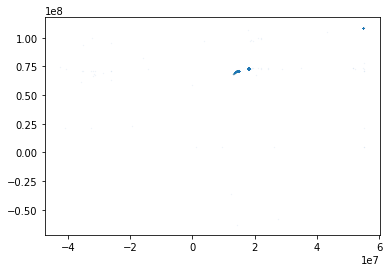

In [11]:
class AISDataset(torch.utils.data.Dataset):
    def __init__(self, datapoints):
        super().__init__()
        self.datapoints = datapoints
        self.X = []
        self.Y = []
        for point in self.datapoints:
            x= point[1]
            y=point[2]
            self.X.append(x)
            self.Y.append(y)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

    def __len__(self):
        return len(self.X)
# temporary helper func.
def read_file(path):
    file_data = np.loadtxt(path, delimiter=',')
    if file_data is not None:
        x = file_data[:, 1]
        y = file_data[:, 2]
#         x = np.random.normal(5.0, 1.0, 1000)
#         y = np.random.normal(10.0, 2.0, 1000)
        print(len(x))
        plt.scatter(x=x, y=y, s=0.1, alpha=0.1)
        plt.show()
        # input()
    return file_data


if __name__ == '__main__':
    plt.ion()
    ais_data = read_file(os.path.join('data','trainingData', '202012.txt'))
    ais_dataset = AISDataset(ais_data)

In [6]:
path = os.path.join('data','trainingData','202012.txt')
out = os.path.join('data','trainingData','data202012.txt')
with open(path,'r')as f:
    with open(out,'w')as o:
        for idx, line in enumerate(f.readlines()):
            line = line.replace('"', '')
            single_datapoint = np.array(line.split(','))
            mmsi = single_datapoint[0]
            lat = float(int(single_datapoint[1])/600000)
            lon = float(int(single_datapoint[2])/600000)
            speed = int(single_datapoint[3])/10
            course = int(single_datapoint[4])/10
            heading = int(single_datapoint[5])/10
            time = single_datapoint[6]
            ans = "{},{},{},{},{},{},{}\n".format(mmsi, lat, lon, speed, course, heading, time)
            o.write(ans)
    o.close()
    print("DONE")
    f.close()

DONE


In [11]:
a = Tensor((1,2,3,4))
b = Tensor((5,6,7,8))
a

tensor([1., 2., 3., 4.])

In [15]:
c = torch.stack((a,b),dim=0)
c

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])

In [10]:
a = Tensor([[1,2,3,4],[5,6,7,8],[1,3,5,7]])
b = Tensor([[9,8,7,6],[1,2,3,4]])
print(a.shape)
print(b.shape)

torch.Size([3, 4])
torch.Size([2, 4])


In [14]:
c = b[-1].repeat((4-2),1)
c

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 4.]])

In [16]:
a=a.transpose(0,1)
a

tensor([[1., 5., 1.],
        [2., 6., 3.],
        [3., 7., 5.],
        [4., 8., 7.]])

In [31]:
a = Tensor(np.random.randn(28,100))
b = Tensor(np.random.randn(2,100))
print(a.shape)
print(b.shape)


torch.Size([28, 100])
torch.Size([2, 100])


In [32]:
c = torch.cat([a,b],dim=1)
print(c.shape)
c

RuntimeError: Sizes of tensors must match except in dimension 1. Got 28 and 2 in dimension 0 (The offending index is 1)

In [36]:
d = Tensor(np.random.randn(28,200))
d.unsqueeze(0).shape

torch.Size([1, 28, 200])